# GRIB2 -> xarray, plotting a time step

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

ds = xr.load_dataset('data/aqm.t06z.ave_1hr_pm25_bc.20240514.227.grib2', engine='cfgrib')
ds

<xarray.Dataset> Size: 459MB
Dimensions:     (step: 72, y: 1025, x: 1473)
Coordinates:
    time        datetime64[ns] 8B 2024-05-14T06:00:00
  * step        (step) timedelta64[ns] 576B 01:00:00 ... 3 days 00:00:00
    sigma       float64 8B 1.0
    latitude    (y, x) float64 12MB 12.19 12.2 12.21 12.23 ... 57.31 57.3 57.29
    longitude   (y, x) float64 12MB 226.5 226.6 226.6 ... 310.5 310.5 310.6
    valid_time  (step) datetime64[ns] 576B 2024-05-14T07:00:00 ... 2024-05-17...
Dimensions without coordinates: y, x
Data variables:
    pmtf        (step, y, x) float32 435MB nan nan nan nan ... 1.924 1.924 1.924
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-11-08T17:17 GRIB to CDM+CF via cfgrib-0.9.1...

In [2]:
ds.nbytes / 1000000

458.987968

In [3]:
da = ds['pmtf'].isel(step=0)
da

<xarray.DataArray 'pmtf' (y: 1025, x: 1473)> Size: 6MB
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [2.577623 , 2.577623 , 2.567623 , ..., 2.9276228, 2.9476228,
        2.9576228],
       [2.587623 , 2.577623 , 2.567623 , ..., 2.9176228, 2.9376228,
        2.9376228],
       [2.6076229, 2.5976229, 2.587623 , ..., 2.8976228, 2.9176228,
        2.9276228]], dtype=float32)
Coordinates:
    time        datetime64[ns] 8B 2024-05-14T06:00:00
    step        timedelta64[ns] 8B 01:00:00
    sigma       float64 8B 1.0
    latitude    (y, x) float64 12MB 12.19 12.2 12.21 12.23 ... 57.31 57.3 57.29
    longitude   (y, x) float64 12MB 226.5 226.6 226.6 ... 310.5 310.5 310.6
    valid_time  datetime64[ns] 8B 2024-05-14T07:00:00
Dimensions without coordinates: y, x
Attributes: (12/34)
    GRIB_paramId:                             260375
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1509825
    GRIB_typeOfLevel:                         sigma
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_name:                                Particulate matter (fine)
    GRIB_shortName:                           pmtf
    GRIB_units:                               (10**-6 g) m**-3
    long_name:                                Particulate matter (fine)
    units:                                    (10**-6 g) m**-3
    standard_name:                            unknown

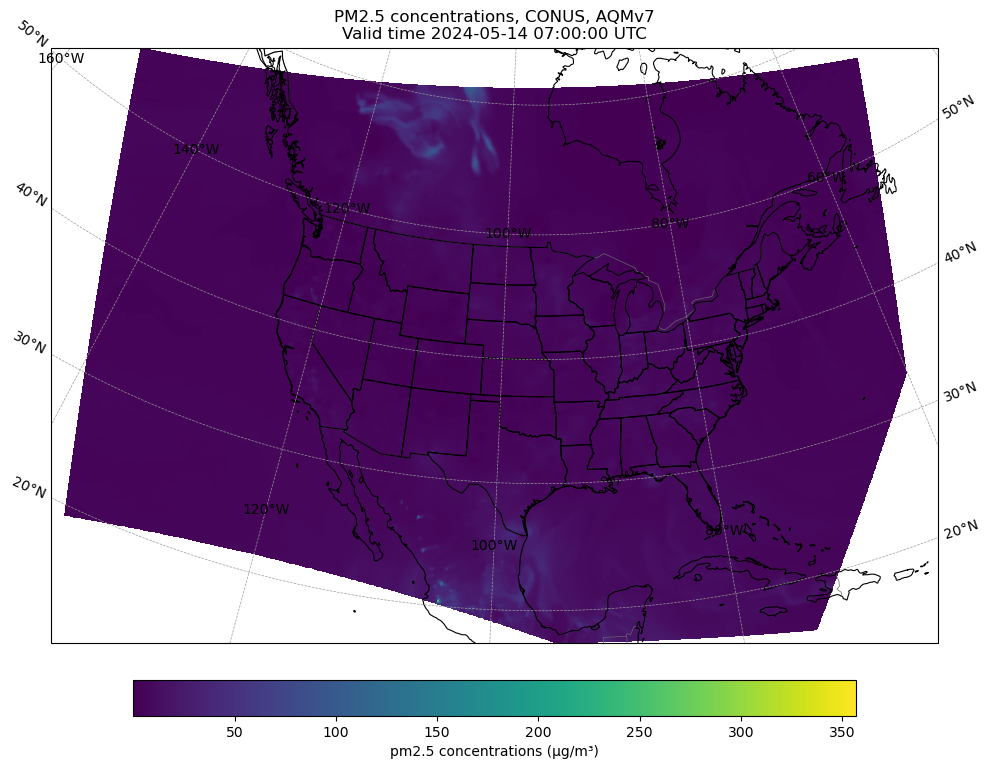

In [4]:
pc, lc = ccrs.PlateCarree(), ccrs.LambertConformal()

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=lc)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=pc,
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, CONUS, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

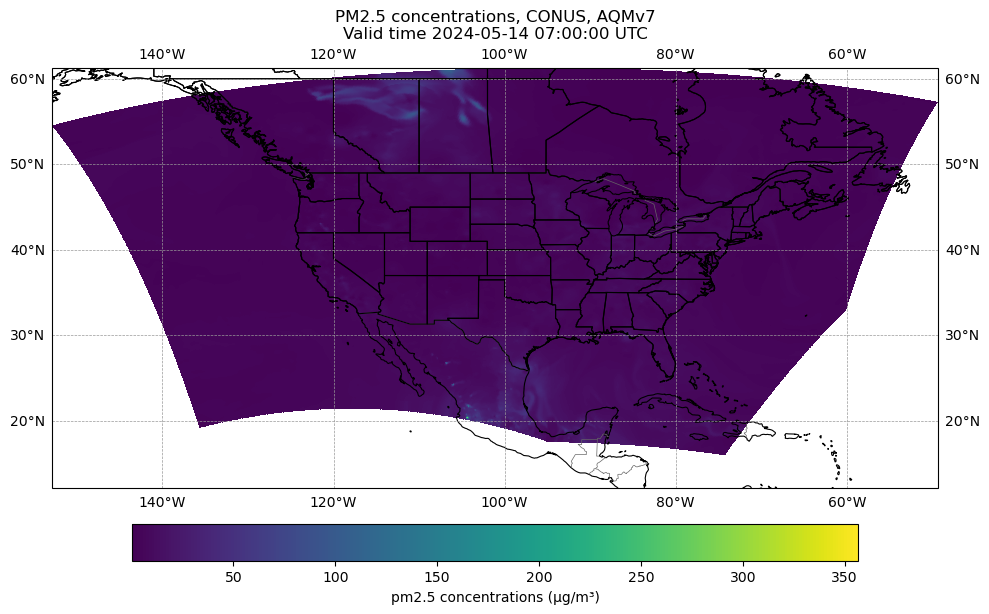

In [5]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=pc)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=pc,
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, CONUS, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

# LA visualization
- Subregion
- Reproject to equirectangular
- Limit max PM2.5 to be 20 so everything isn't just purple

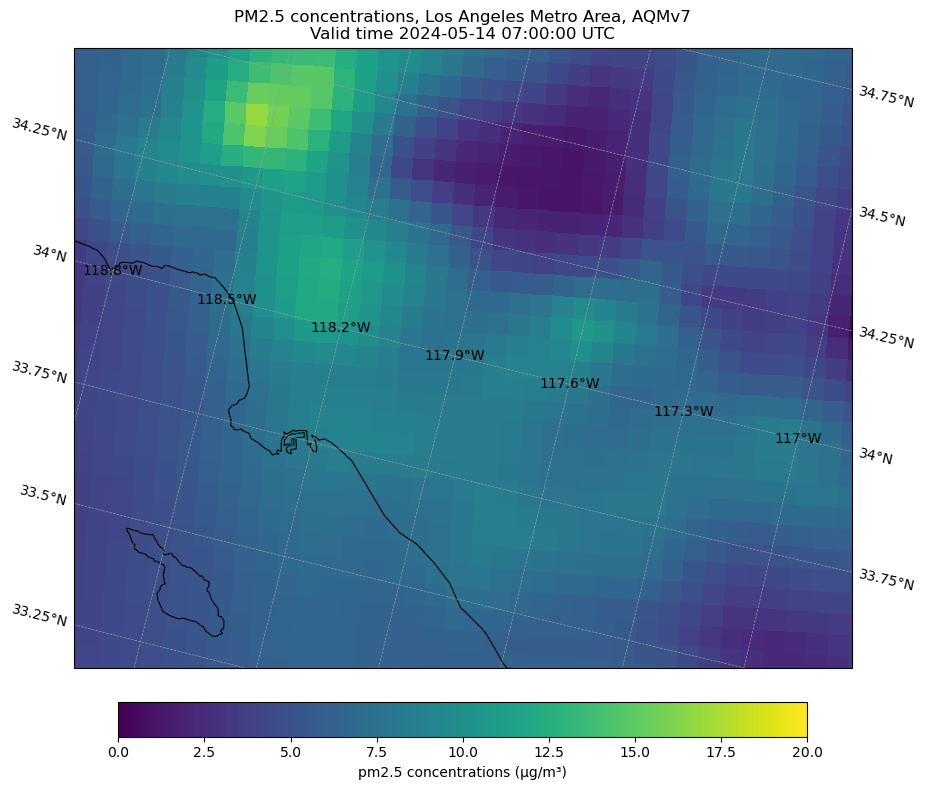

In [6]:
lat_bottom, lat_top = 33.5, 34.5
lon_bottom, lon_top = -118.75, -117.0
la_extent = (lon_bottom, lon_top, lat_bottom, lat_top)

fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=lc)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")
ax.set_extent(la_extent, crs=pc)

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=pc,
    vmin=0, vmax=20
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, Los Angeles Metro Area, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

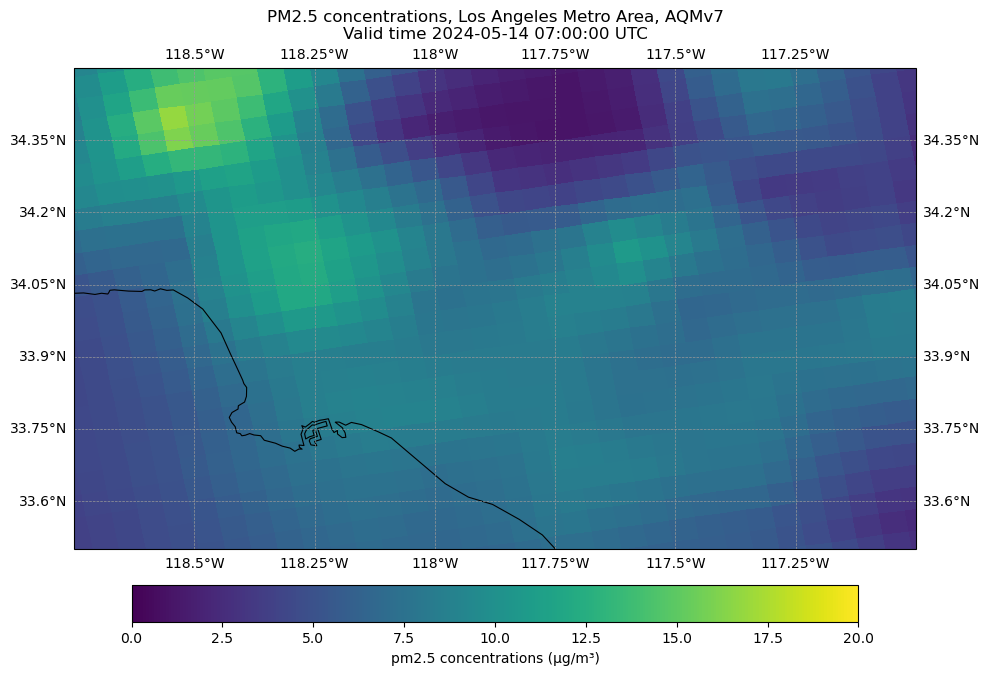

In [7]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=pc)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")
ax.set_extent(la_extent, crs=pc)

pcm = ax.pcolormesh(
    da['longitude'], da['latitude'], da,
    transform=pc,
    vmin=0, vmax=20
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, Los Angeles Metro Area, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

# Reproject
Note that previous reprojection only occurs on the plotting end, so id we want a reprojection, we're gonna have to do it manually.

In [8]:
from pyproj import CRS, Transformer
import rioxarray
import numpy as np

da = ds['pmtf'].isel(step=0)
da = da.rio.set_spatial_dims(x_dim='x', y_dim='y', inplace=False)

# set lcc crs
crs_lcc = CRS.from_dict({
    'proj' : 'lcc',
    'lat_1' : da.GRIB_Latin1InDegrees,
    'lat_2' : da.GRIB_Latin2InDegrees,
    'lat_0' : da.GRIB_LaDInDegrees,
    'lon_0' : da.GRIB_LoVInDegrees,
    'x_0' : 0.0,
    'y_0' : 0.0,
    'a' : 6371229.0,
    'b' : 6371229.0,
    'units' : 'm',
    'no_defs' : True
})
da = da.rio.write_crs(crs_lcc, inplace=False)

# project first grid point
lat_first = da.GRIB_latitudeOfFirstGridPointInDegrees
lon_first = da.GRIB_longitudeOfFirstGridPointInDegrees
to_lcc = Transformer.from_crs("EPSG:4326", crs_lcc, always_xy=True)
x0_center, y0_center = to_lcc.transform(lon_first, lat_first)

# build x/y coordinate arrays
Dx, Dy = da.GRIB_DxInMetres, da.GRIB_DyInMetres
Nx, Ny = da.GRIB_Nx, da.GRIB_Ny

x = x0_center + np.arange(Nx) * Dx
y = y0_center + np.arange(Ny) * Dy

# attach coords
da = da.assign_coords(x=("x", x), y=("y", y))

# reproject
m_per_degree_of_lat = 111320.0 # earth circumference (m) / 360 (deg)
mid_lat_of_conus = np.deg2rad(35.0)
lat_res = Dy / m_per_degree_of_lat
lon_res = Dx / (m_per_degree_of_lat * np.cos(mid_lat_of_conus))

out = da.rio.reproject(
    dst_crs='EPSG:4326',
    resolution=(lon_res, lat_res)
    
).rename({"y": "lat", "x": "lon"})

out

<xarray.DataArray 'pmtf' (lat: 1078, lon: 1860)> Size: 8MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon          (lon) float64 15kB -152.9 -152.8 -152.8 ... -49.38 -49.33
  * lat          (lat) float64 9kB 61.27 61.23 61.18 61.13 ... 12.22 12.18 12.13
    step         timedelta64[ns] 8B 01:00:00
    sigma        float64 8B 1.0
    valid_time   datetime64[ns] 8B 2024-05-14T07:00:00
    time         datetime64[ns] 8B 2024-05-14T06:00:00
    spatial_ref  int64 8B 0
Attributes: (12/35)
    GRIB_paramId:                             260375
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1509825
    GRIB_typeOfLevel:                         sigma
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_shortName:                           pmtf
    GRIB_units:                               (10**-6 g) m**-3
    long_name:                                Particulate matter (fine)
    units:                                    (10**-6 g) m**-3
    standard_name:                            unknown
    _FillValue:                               nan

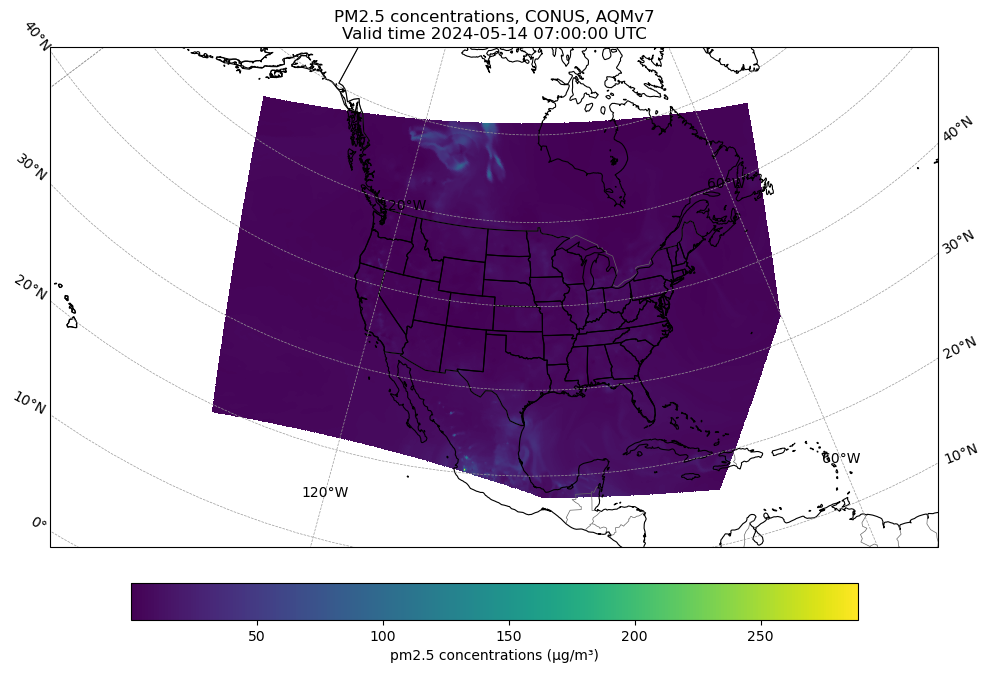

In [9]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=lc)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")

lon2d, lat2d = np.meshgrid(out['lon'], out['lat'])
pcm = ax.pcolormesh(
    lon2d, lat2d, out,
    transform=pc,
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, CONUS, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

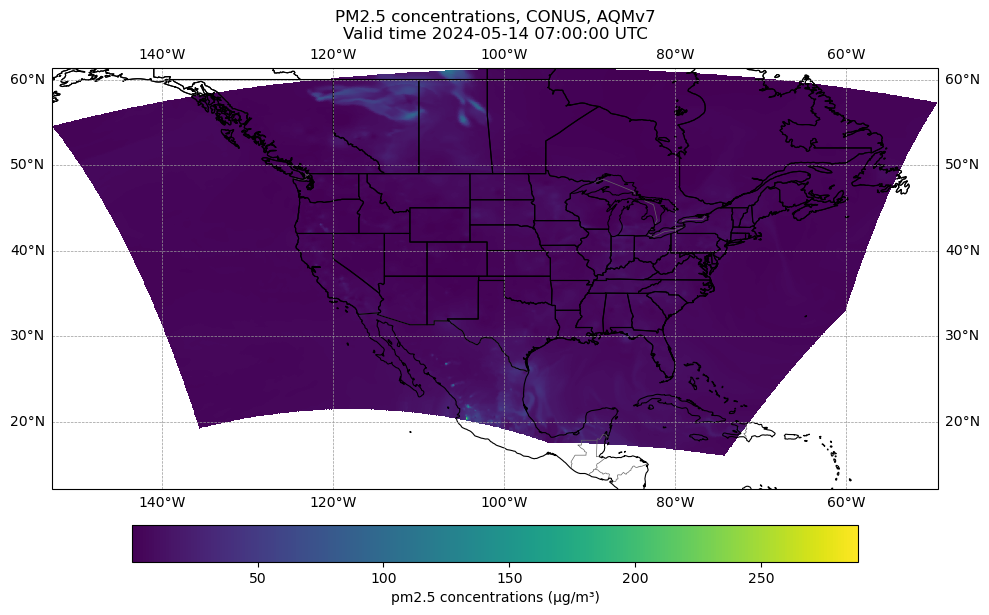

In [10]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=pc)
ax.coastlines(resolution="50m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="0.4")
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")

lon2d, lat2d = np.meshgrid(out['lon'], out['lat'])
pcm = ax.pcolormesh(
    lon2d, lat2d, out,
    transform=pc,
)

cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, CONUS, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

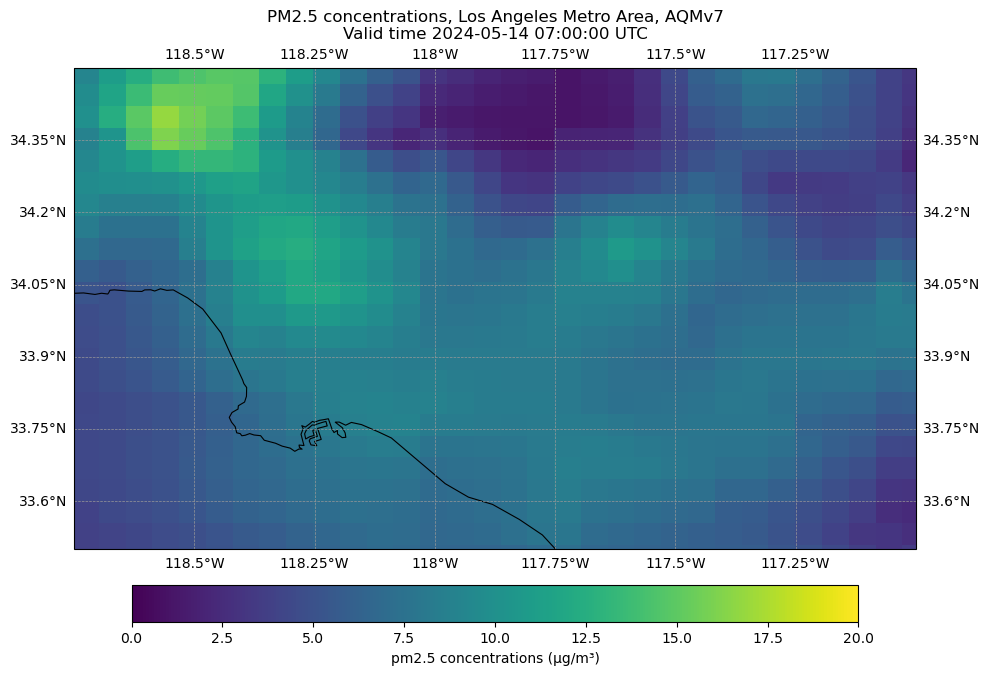

In [11]:
fig = plt.figure(figsize=(10,8))

ax = plt.axes(projection=pc)
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.8)
ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", linestyle="--")
ax.set_extent(la_extent, crs=pc)

lon2d, lat2d = np.meshgrid(out['lon'], out['lat'])
pcm = ax.pcolormesh(
    lon2d, lat2d, out,
    transform=pc,
    vmin=0, vmax=20
)
cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.05, fraction=0.05)
cb.set_label('pm2.5 concentrations (µg/m³)')

valid = pd.to_datetime(da.valid_time.item(), unit='ns')
ax.set_title(
    f'PM2.5 concentrations, Los Angeles Metro Area, AQMv7\n'
    f'Valid time {valid} UTC'
)

plt.tight_layout()
plt.show()

# To numpy

<xarray.DataArray 'pmtf' (lat: 22, lon: 32)> Size: 3kB
array([[ 9.127623 , 11.057623 , 12.4976225, 13.777623 , 14.427623 ,
        14.837623 , 14.727623 , 12.827622 , 11.047623 ,  9.2476225,
         7.477623 ,  6.037623 ,  5.1076226,  3.017623 ,  2.517623 ,
         1.9976228,  1.6876228,  1.5476228,  1.0476228,  1.3576229,
         1.6876228,  2.7076228,  4.427623 ,  6.0876226,  6.897623 ,
         8.037622 ,  8.077622 ,  7.2176228,  6.2776227,  5.2576227,
         3.9376228,  3.1576228],
       [ 9.657623 , 11.657623 , 13.597623 , 15.367622 , 15.237623 ,
        15.187623 , 14.617622 , 11.857623 , 10.037622 ,  8.127623 ,
         6.247623 ,  4.8576226,  3.9676228,  2.287623 ,  1.9676229,
         1.5976229,  1.3476229,  1.2076229,  1.0776229,  1.3076228,
         1.5676228,  2.6376228,  4.197623 ,  5.767623 ,  6.2376227,
         7.347623 ,  7.2176228,  6.6076226,  5.8776226,  4.937623 ,
         3.9176228,  3.047623 ],
       [ 9.967623 , 12.437623 , 14.857623 , 16.857622 , 15.777623 ,
        14.967623 , 13.687623 , 10.867622 ,  8.977623 ,  6.9676228,
         4.9876227,  3.817623 ,  3.047623 ,  1.6476228,  1.4776229,
         1.2476228,  1.1576228,  1.1076229,  1.0876229,  1.2376229,
         1.4176228,  2.4876227,  3.817623 ,  5.1276226,  5.557623 ,
         6.647623 ,  6.437623 ,  6.057623 ,  5.497623 ,  4.747623 ,
...
         5.957623 ,  6.447623 ,  6.647623 ,  7.0676227,  7.287623 ,
         7.517623 ,  7.5276227,  7.347623 ,  6.947623 ,  7.097623 ,
         7.2376227,  7.577623 ,  8.037622 ,  8.427623 ,  7.997623 ,
         7.887623 ,  7.687623 ,  7.4676228,  7.2976227,  6.6076226,
         6.5676227,  6.037623 ,  5.437623 ,  4.8176227,  4.2176228,
         3.0976229,  3.017623 ],
       [ 3.9376228,  4.387623 ,  4.5676227,  4.867623 ,  5.307623 ,
         5.7576227,  6.2176228,  6.447623 ,  6.847623 ,  7.0676227,
         7.287623 ,  7.227623 ,  7.0676227,  6.747623 ,  6.937623 ,
         7.117623 ,  7.497623 ,  7.927623 ,  8.167623 ,  7.5476227,
         7.2976227,  7.0676227,  6.8376226,  6.667623 ,  5.8776226,
         5.7376227,  5.287623 ,  4.7976227,  4.247623 ,  3.6576228,
         2.6076229,  2.3776228],
       [ 3.8476229,  4.037623 ,  4.287623 ,  4.5476227,  4.827623 ,
         5.187623 ,  5.5676227,  5.8576226,  6.2776227,  6.6276226,
         6.8576226,  7.077623 ,  6.957623 ,  6.647623 ,  6.7376227,
         6.907623 ,  7.307623 ,  7.747623 ,  7.847623 ,  6.997623 ,
         6.7576227,  6.557623 ,  6.307623 ,  6.0676227,  5.7976227,
         5.557623 ,  5.1076226,  4.597623 ,  3.9076228,  3.1576228,
         3.1076229,  2.6676228]], dtype=float32)
Coordinates:
  * lon          (lon) float64 256B -118.7 -118.7 -118.6 ... -117.1 -117.0
  * lat          (lat) float64 176B 34.49 34.44 34.4 34.35 ... 33.62 33.58 33.53
    step         timedelta64[ns] 8B 01:00:00
    sigma        float64 8B 1.0
    valid_time   datetime64[ns] 8B 2024-05-14T07:00:00
    time         datetime64[ns] 8B 2024-05-14T06:00:00
    spatial_ref  int64 8B 0
Attributes: (12/35)
    GRIB_paramId:                             260375
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1509825
    GRIB_typeOfLevel:                         sigma
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    ...                                       ...
    GRIB_shortName:                           pmtf
    GRIB_units:                               (10**-6 g) m**-3
    long_name:                                Particulate matter (fine)
    units:                                    (10**-6 g) m**-3
    standard_name:                            unknown
    _FillValue:                               nan

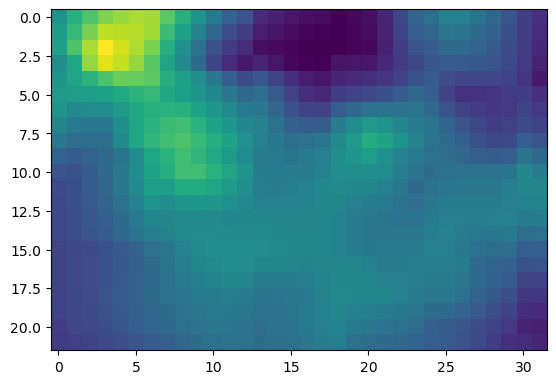

In [12]:
subset = out.sel(
    lon=slice(lon_bottom, lon_top),
    lat=slice(lat_top, lat_bottom)
)
display(subset)
plt.imshow(subset.data)
plt.show()

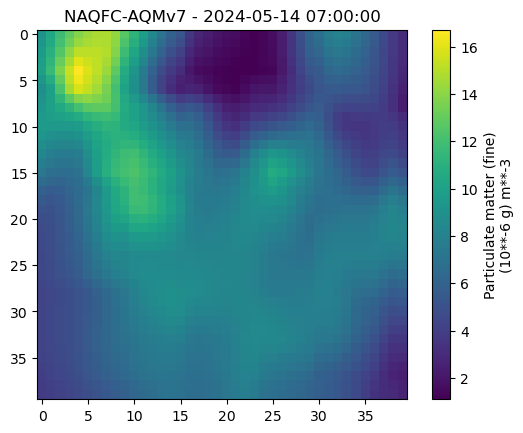

In [13]:
import cv2
subset_data = cv2.resize(subset.data, (40, 40))
im = plt.imshow(subset_data)
plt.colorbar(im, label=f'{subset.long_name}\n{subset.units}')
plt.title(f'NAQFC-AQMv7 - {pd.to_datetime(subset.valid_time.item(), unit="ns")}')
plt.show()

# Compare with AirNow

In [14]:
dates = pd.date_range('2023-08-02', '2025-08-02', freq='h', inclusive='left')
idx = dates.get_loc(pd.to_datetime('2024-05-14 07:00:00'))
idx

6871

In [15]:
# data raw idw'd with 25 elevation scale, presplit
airnow = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/airnow_cache/airnow_processed.npz', allow_pickle=True)
airnow_data = airnow['data']
sensors = airnow['air_sens_loc'].item()

print(airnow_data.shape)
print(sensors)

# shortening
sensors = {
    'Simi Valley': (8, 1),
    'Reseda': (12, 4),
    'Santa Clarita': (4, 5),
    'North Holywood': (12, 8),
    'Los Angeles': (17, 11),
    'Compton': (23, 12),
    'Long Beach': (28, 13),
    'Anaheim': (26, 18),
    'Glendora': (14, 20),
    'Mira Loma': (20, 28),
    'Fontana': (15, 28),
    'Riverside': (20, 30),
    'Lake Elsinore': (32, 32),
    'Crestline': (10, 33),
    'Temecula': (36, 38)
}
sensors

(17544, 40, 40)
{'Simi Valley - Cochran Street': (8, 1), 'Reseda': (12, 4), 'Santa Clarita': (4, 5), 'North Holywood': (12, 8), 'Los Angeles - N. Main Street': (17, 11), 'Compton': (23, 12), 'Long Beach Signal Hill': (28, 13), 'Anaheim': (26, 18), 'Glendora - Laurel': (14, 20), 'Mira Loma - Van Buren': (20, 28), 'Fontana - Arrow Highway': (15, 28), 'Riverside - Rubidoux': (20, 30), 'Lake Elsinore - W. Flint Street': (32, 32), 'Crestline - Lake Gregory': (10, 33), 'Temecula (Lake Skinner)': (36, 38)}


{'Simi Valley': (8, 1),
 'Reseda': (12, 4),
 'Santa Clarita': (4, 5),
 'North Holywood': (12, 8),
 'Los Angeles': (17, 11),
 'Compton': (23, 12),
 'Long Beach': (28, 13),
 'Anaheim': (26, 18),
 'Glendora': (14, 20),
 'Mira Loma': (20, 28),
 'Fontana': (15, 28),
 'Riverside': (20, 30),
 'Lake Elsinore': (32, 32),
 'Crestline': (10, 33),
 'Temecula': (36, 38)}

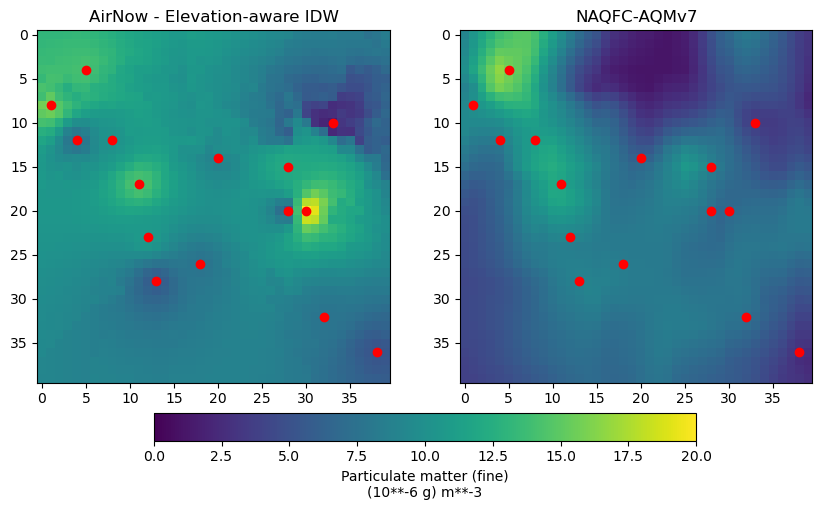

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

im1 = axs[0].imshow(airnow_data[idx], vmin=0, vmax=20)
axs[0].scatter([y for x, y in sensors.values()], [x for x, y in sensors.values()], color='r')
axs[0].set_title('AirNow - Elevation-aware IDW')

im2 = axs[1].imshow(subset_data, vmin=0, vmax=20)
axs[1].scatter([y for x, y in sensors.values()], [x for x, y in sensors.values()], color='r')
axs[1].set_title('NAQFC-AQMv7')

fig.colorbar(im2, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.05, fraction=0.05, shrink=0.7, label=f'{subset.long_name}\n{subset.units}')

plt.show()

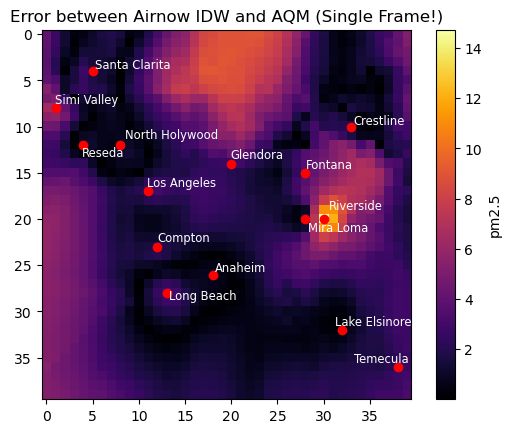

In [17]:
from adjustText import adjust_text

plt.imshow(np.abs(airnow_data[idx] - subset_data), cmap='inferno')
plt.colorbar(label='pm2.5')
X, Y = [x for x, y in sensors.values()], [y for x, y in sensors.values()]
plt.scatter(Y, X, color='r')
texts = [plt.text(Y[i], X[i], name, color='white', size='small') for i, name in enumerate(sensors.keys())]
adjust_text(texts)
plt.title('Error between Airnow IDW and AQM (Single Frame!)')
plt.show()

Thoughts:
- Mostly agree on the places we care about
- We expect disagreement (uncertainty) on SG mountains, ocean
- Huge disagreement on Riverside sensor; this is just one hour, so it can be just an outlier
- I forgot but this is nowcast

In [18]:
openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/openaq_cache/openaq_processed.npz', allow_pickle=True)
openaq_data = openaq['data']
print(openaq_data.shape)
print(openaq['sensor_locations'])

(17544, 40, 40)
{'Glendora - Laurel': (14, 20), 'Temecula (Lake Skinn': (36, 38), 'Mira Loma - Van Bure': (20, 28), 'Compton': (23, 12), 'Santa Clarita': (4, 5), 'Reseda': (12, 4), 'Los Angeles - N. Mai': (17, 11), 'North Holywood': (12, 8), 'Fontana - Arrow High': (15, 28), 'Lake Elsinore - W. F': (32, 32), 'Long Beach Signal Hi': (28, 13), 'Crestline - Lake Gre': (10, 33), 'Simi Valley - Cochra': (8, 1), 'Anaheim': (26, 18), 'Riverside - Rubidoux': (20, 30), 'Rio Vista ES (6288)': (14, 8), 'Lanai Rd ES (4764)': (14, 5), 'Rowan ES (6425)': (18, 12), 'Gulf ES (4315)': (28, 10), 'South Shores Per Arts Mag ES (6870)': (31, 9), 'Arminta St ES (2205)': (11, 8), 'Calvert ES (2712)': (12, 4), '54th St ES (3781)': (20, 9), 'Stagg ES (6890)': (11, 5), 'Taft HS (8880)': (13, 4), 'Sharp ES (6665)': (9, 7), 'Compton ES (3205)': (22, 11), 'Curtiss MS (8103)': (25, 11), 'Weigand ES (7634)': (22, 11), 'Vinedale ES (7548)': (10, 9), 'Trinity ES (7219)': (19, 10), 'Berendo MS (8057)': (18, 10), 'Atwat

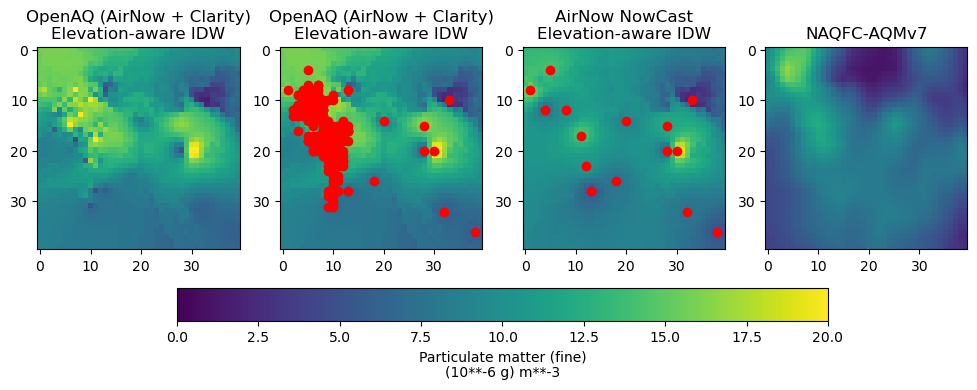

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(12, 10))

im1 = axs[0].imshow(openaq_data[idx], vmin=0, vmax=20)
axs[0].set_title('OpenAQ (AirNow + Clarity)\nElevation-aware IDW')

im2 = axs[1].imshow(openaq_data[idx], vmin=0, vmax=20)
axs[1].scatter([y for x, y in openaq['sensor_locations'].item().values()], [x for x, y in openaq['sensor_locations'].item().values()], color='r')
axs[1].set_title('OpenAQ (AirNow + Clarity)\nElevation-aware IDW')

im3 = axs[2].imshow(airnow_data[idx], vmin=0, vmax=20)
axs[2].scatter([y for x, y in sensors.values()], [x for x, y in sensors.values()], color='r')
axs[2].set_title('AirNow NowCast\nElevation-aware IDW')

im4 = axs[3].imshow(subset_data, vmin=0, vmax=20)
axs[3].set_title('NAQFC-AQMv7')

fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.05, fraction=0.05, shrink=0.7, label=f'{subset.long_name}\n{subset.units}')

plt.show()

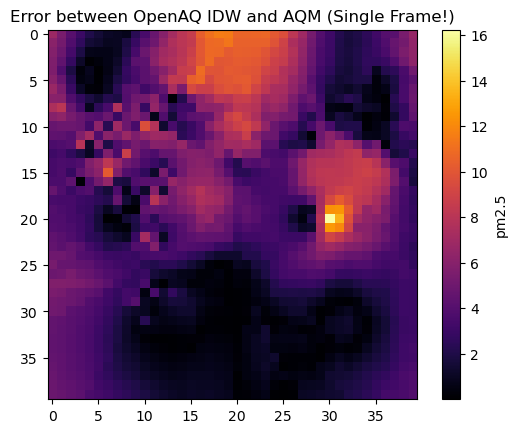

In [20]:
plt.imshow(np.abs(openaq_data[idx] - subset_data), cmap='inferno')
plt.colorbar(label='pm2.5')
X, Y = [x for x, y in sensors.values()], [y for x, y in sensors.values()]
#plt.scatter(Y, X, color='r')
#texts = [plt.text(Y[i], X[i], name, color='white', size='small') for i, name in enumerate(sensors.keys())]
#adjust_text(texts)
plt.title('Error between OpenAQ IDW and AQM (Single Frame!)')
plt.show()